
**Materia:** MACHINE LEARNING II

**Especialización en Analítica y Ciencia de Datos**

**Facultad de Ingeniería - Universidad de Antioquia**

**Daniel Restrepo Alvarez**

  ID: 8'175.343

**Diego Alejandro Salazar Blandón**

  ID: 15'373.359



##1.In your own words, describe what vector embeddings are and what they are useful for.

Vector embeddings are techniques that seek to convert objects such as words, images, audios or documents into structured data such as vectors. For this purpose, its principle is to take the data to a new vector space where the properties or special attributes of the objects are preserved. For example, in the case of words in a text it is expected to obtain vectors without losing the original meaning of the text, one approach to achieve this end is that the vectors representing the words can somehow preserve the original semantics understanding that the distance between the vectors can represent the semantic similarity in the text. In this context Vector embeddings can be useful for

•	Semantic analysis: It allows to understand and measure the semantic similarity between words or phrases. For example, we can calculate the similarity between two words by finding the Euclidean or cosine distance between their embedding vectors.

•	Language models: Modern language models, such as BERT and GPT, use vector embeddings to represent words and generate richer, more contextual representations.

•	Text classification: Vector embeddings can be used as features to feed text classification models, such as sentiment classification, spam detection, etc.

•	Machine translation: They facilitate machine translation by helping to capture the semantic relationships between words in different languages.

•	Content recommendation: These are used to recommend products, content or similar items based on user preferences and behaviors.

•	Data grouping and visualization: Can be used to group similar documents or entities into a vector space and visualize them for exploratory analysis.

there are other applications in different areas as:

**Object Recognition and Computer Vision:**
In tasks such as object detection and facial recognition, embeddings can be used to represent features and relationships between objects in images.
In video analysis, vector embeddings can help recognize actions and scenes.

**Recommendation Systems:**
Embeddings can be used to represent users and items (products, movies, music, etc.), enabling more effective recommendation systems by calculating similarities in the vector space.

**Biomedicine:**
In the field of biomedicine, vector embeddings are applied to represent proteins, genes, or chemical compounds, aiding in disease classification, drug discovery, and analysis of molecular interactions.

**Social Networks and Network Analysis:**
In social network analysis, embeddings can be used to represent users and relationships between them, allowing for the identification of communities, influencers, and trends.

**Path Recommendation Systems:**
In navigation or path planning applications, embeddings can be used to represent places and routes, facilitating optimal route recommendations.

**Music and Audio:**
In music analysis, embeddings can be used to represent songs, audio snippets, or musical features, aiding in genre classification, music recommendations, among others.

**Gaming and Strategy:**
In games and strategy, embeddings can represent game states, player strategies, and possible actions, contributing to the development of AI for games.


##2. What do you think is the best distance criterion to estimate how far two embeddings (vectors) are from each other? Why?


The time it takes to calculate the distance between two vectors increases with the number of vector dimensions. In addition, some similarity measures require more computation than others. This could be a challenge for calculating distances between vectors with thousands of dimensions.

For that reason, we consider that the best criterion is the one that balances speed and accuracy in the calculation of distances between vectors depending on the data. So although we have this criterion, there is no single standard or technique for calculating the distance between two vectors that is universal and always depends on the data and the dimension.


##3. Let us build a Q&A (question answering) system! 😀For this, consider the following steps:
a. Pick whatever text you like, in the order of 20+ paragraphs.

b. Split that text into meaningful chunks/pieces.

c. Implement the embedding generation logic. Which tools and approaches would help you generate
them easily and high-level?

d. For every question asked by the user, return a sorted list of the N chunks/pieces in your text that
relate the most to the question. Do results make sense?

In [1]:
from docx import Document
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch

def split_docx(filename):
    doc = Document(filename)
    chunks = []

    current_chunk = []
    for para in doc.paragraphs:
        if para.text.strip():
            current_chunk.append(para.text)
        else:
            if current_chunk:
                chunks.append("\n".join(current_chunk))
                current_chunk = []

    if current_chunk:
        chunks.append("\n".join(current_chunk))

    return chunks

# Load the model and tokenizer
model_name = "deepset/roberta-base-squad2"
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Function to ask a question and get the answer
def ask_question(question, context):
    inputs = tokenizer(question, context, return_tensors="pt")
    outputs = model(**inputs)
    answer_start = torch.argmax(outputs.start_logits)
    answer_end = torch.argmax(outputs.end_logits) + 1
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][answer_start:answer_end]))
    return answer

# Function to get the N most relevant chunks for a question
def get_top_n_chunks(question, chunks, n):
    chunk_scores = []

    for idx, chunk in enumerate(chunks):
        answer = ask_question(question, chunk)
        chunk_scores.append((idx, chunk, answer))

    top_n_chunks = sorted(chunk_scores, key=lambda x: len(x[2]), reverse=True)[:n]
    return top_n_chunks

# Usage
filename = '31 Best Places to Visit in Colombia.docx'
chunks = split_docx(filename)

questions = [
    "What can I do in Medellin?",
    "Which is the most important paragraph in the text?"
]

N = 3  #top of number chunks

for question in questions:
    print(f"Question: {question}\n")
    top_chunks = get_top_n_chunks(question, chunks, N)

    for idx, (chunk_idx, chunk, answer) in enumerate(top_chunks, start=1):
        print(f"Top Chunk {idx} (Score: {len(answer)}):\n{chunk}\n{'-'*30}\n")

C:\ProgramData\anaconda3\envs\MLII\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Question: What can I do in Medellin?

Top Chunk 1 (Score: 351):
What is really special about Guadalupe is the surrounding nature and outdoor activities on offer. Las Gachas de Guadalupe are naturally jacuzzi plunge pools formed in a shallow river, where you can enjoy a dip in the warm water. If you’re feeling brave, you can slide along the smooth rocks and drop into the water.
------------------------------

Top Chunk 2 (Score: 329):
Colombia’s second-biggest city was once considered the most dangerous city in the world. But not anymore. Thanks to some imaginative civil projects and the will and resilience of local residents, Medellin has emerged from its shadowy past to become one of the best places to visit in Colombia.
------------------------------

Top Chunk 3 (Score: 247):
This little village is becoming increasingly popular among tourists because it neighbours the much bigger and more developed Santa Marta. Taganga allows visitors the opportunity to mingle with holidaying locals

In [2]:
from docx import Document
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch

def split_docx(filename):
    doc = Document(filename)
    chunks = []

    current_chunk = []
    for para in doc.paragraphs:
        if para.text.strip():
            current_chunk.append(para.text)
        else:
            if current_chunk:
                chunks.append("\n".join(current_chunk))
                current_chunk = []

    if current_chunk:
        chunks.append("\n".join(current_chunk))

    return chunks

# Load the model and tokenizer
model_name = "deepset/bert-large-uncased-whole-word-masking-squad2"
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Function to ask a question and get the answer
def ask_question(question, context):
    inputs = tokenizer(question, context, return_tensors="pt")
    outputs = model(**inputs)
    answer_start = torch.argmax(outputs.start_logits)
    answer_end = torch.argmax(outputs.end_logits) + 1
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][answer_start:answer_end]))
    return answer

# Function to get the N most relevant chunks for a question
def get_top_n_chunks(question, chunks, n):
    chunk_scores = []

    for idx, chunk in enumerate(chunks):
        answer = ask_question(question, chunk)
        chunk_scores.append((idx, chunk, answer))

    top_n_chunks = sorted(chunk_scores, key=lambda x: len(x[2]), reverse=True)[:n]
    return top_n_chunks

# Usage
filename = '31 Best Places to Visit in Colombia.docx'
chunks = split_docx(filename)

questions = [
    "What can I do in Medellin?",
    "Which is the most important paragraph in the text?"
]

N = 3  #top of number chunks

for question in questions:
    print(f"Question: {question}\n")
    top_chunks = get_top_n_chunks(question, chunks, N)

    for idx, (chunk_idx, chunk, answer) in enumerate(top_chunks, start=1):
        print(f"Top Chunk {idx} (Score: {len(answer)}):\n{chunk}\n{'-'*30}\n")

Some weights of the model checkpoint at deepset/bert-large-uncased-whole-word-masking-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Question: What can I do in Medellin?

Top Chunk 1 (Score: 224):
From the Caribbean coastline to the edge of the Amazon, Spanish colonial towns to modern metropolises, Colombia tourist spots to hidden gems, these are the 31 very best places to travel in Colombia.
------------------------------

Top Chunk 2 (Score: 191):
With its colonial architecture, cobblestone streets and white-washed facades, Villa de Leyva is considered one of the most beautiful towns in Colombia. It’s best know for being home to the biggest Spanish Square in the country, the 150,000 square-foot Plaza Mayor.
------------------------------

Top Chunk 3 (Score: 170):
Dubbed the ‘City of Eternal Spring’, Medellin is located in a rich and fertile part of Colombia responsible for producing much of the country’s coffee, fruit and flowers. The city itself is surprisingly large: Brick houses spread out for miles in every direction, best viewed from lookouts accessed via cable cars connected to the only metro system in Colo

##4. What do you think that could make these types of systems more robust in terms of semantics and functionality?


There are a large number of NLP models such as Bert, GPT, T5, Electra, Roberta, XLNET, among others. Additionally, they come with different levels of training, which offer varying degrees of accuracy.

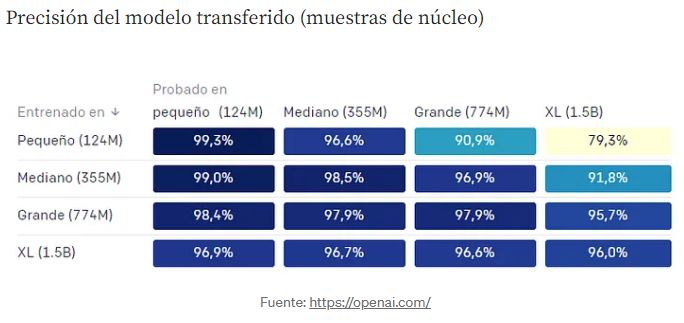

In practice, not only should accuracy be assessed, but also the computational cost of a model, both in execution and training. And in this line of thinking, finding the ideal model for our needs.

In addition to finding the ideal model, it is possible to implement other strategies such as:

- Providing training examples with precise and detailed semantic annotations to teach the model to understand complex semantic contexts and relationships.

- Gathering and utilizing feedback from real users to correct and enhance the system's performance.